#### The other notebook (WA_base_code) does the preprocessing and this one does the modelling

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [5]:
mydata= pd.read_csv("C:\\Users\\sheep\\OneDrive\\Documents\\GitHub\\WAMuseum\\path_to_updated_csv_file.csv")

Let's say we want to test predicting type just based on the images.

In [6]:
def load_process_image(file_path):
    # Load the image and resize it for AlexNet
    img = image.load_img(file_path, target_size=(255, 255))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image as required by AlexNet
    return img_array

In [7]:
# Find the 6 most frequent types
top_six_types = mydata['type'].value_counts().nlargest(7).index

# Create a subset of the data with only these types
subset_mydata = mydata[mydata['type'].isin(top_six_types)]

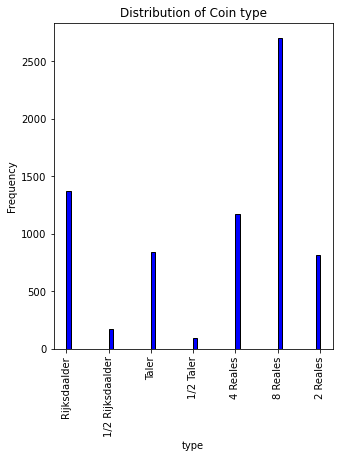

In [8]:
# Plot histogram with a reasonable number of bins
plt.figure(figsize=(5, 6))
plt.hist(subset_mydata['type'], bins=60, color='blue', edgecolor='black')
plt.xlabel('type')
plt.ylabel('Frequency')
plt.title('Distribution of Coin type')
plt.xticks(rotation=90)  # Rotate the labels for better readability
plt.show()

In [9]:
# Preprocess images and extract corresponding classes
image_data = []
for index, row in subset_mydata.iterrows():
    processed_img = load_process_image(row['local_image_path'])
    image_data.append(processed_img)

# Convert to numpy arrays
image_data = np.vstack(image_data)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#enc = OneHotEncoder(handle_unknown='ignore')
y = pd.get_dummies(subset_mydata['type'])
X_train, X_test, y_train, y_test = train_test_split(image_data, y, test_size=0.2, random_state=42)

In [11]:
import keras
img_height, img_width = 255, 255

num_classes = 7

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(img_width,img_height,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes,activation='softmax')    
    
])
model.compile(optimizer='adam', loss=losses.categorical_crossentropy, metrics=['accuracy']) 

In [12]:

#history = model.fit(X_train, y_train, batch_size=64, callbacks=[callback], epochs=40, validation_data=(X_test, y_test))

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(36)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'history' is not defined

In [ ]:
#model.save('models/ALEX_type_7_classes.keras')

In [14]:
model = tf.keras.models.load_model('models/ALEX_type_7_classes.keras')

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#Generate predictions with the model using our X values
y_pred = model.predict(X_test)

In [20]:
y,levels = pd.factorize(subset_mydata['type'])

In [21]:
levels

Index(['Rijksdaalder', '1/2 Rijksdaalder', 'Taler', '1/2 Taler', '4 Reales',
       '8 Reales', '2 Reales'],
      dtype='object')

In [31]:
#class_names = y_test.columns.to_list()

cf = confusion_matrix(
    y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

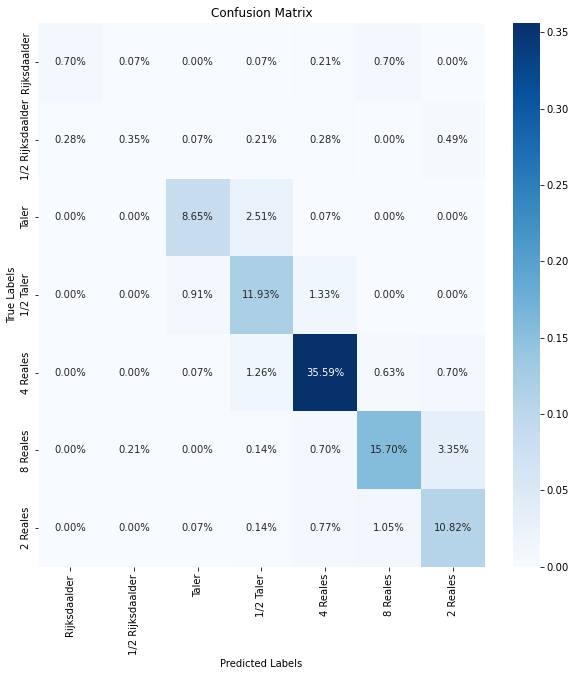

In [35]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(cf/np.sum(cf), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=levels, yticklabels=levels)
# Labels for x and y axes
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Title for your confusion matrix
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [39]:
num_samples = 5  # Number of samples to display
indices = np.random.choice(range(len(y_test)), num_samples, replace=False)

plt.figure(figsize=(15, 5))
for index, row in subset_mydata.iterrows():
    processed_img = load_process_image(row['local_image_path'])
    plt.subplot(1, num_samples, index)
    plt.imshow(processed_img[0])
    #plt.title(f'True: {levels[y_test[row]]}\nPredicted: {levels[y_pred[row]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

ValueError: num must be 1 <= num <= 5, not 0

<Figure size 1080x360 with 0 Axes>

In [58]:
predicted = y_pred.argmax(axis=1)
actual = y_test.values.argmax(axis=1)
TP = np.count_nonzero(predicted * actual)
TN = np.count_nonzero((predicted - 1) * (actual - 1))
FP = np.count_nonzero(predicted * (actual - 1))
FN = np.count_nonzero((predicted - 1) * actual)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * precision * recall / (precision + recall)
accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)
print("Accuracy: ", accuracy)

Precision:  0.5008919015340706
Recall:  0.5007132667617689
F1:  0.5008025682182985
Accuracy:  0.5008915834522111


In [56]:
y_test.values.argmax(axis=1)

array([4, 5, 6, ..., 3, 4, 2], dtype=int64)

In [57]:
y_pred.argmax(axis=1)

array([4, 5, 6, ..., 3, 4, 2], dtype=int64)

In [80]:
def accuracy(y_true, y_pred):
    
    """
    Function to calculate accuracy
    -> param y_true: list of true values
    -> param y_pred: list of predicted values
    -> return: accuracy score
    
    """
    
    # Intitializing variable to store count of correctly predicted classes
    correct_predictions = 0
    
    for yt, yp in zip(y_true, y_pred):
        
        if yt == yp:
            
            correct_predictions += 1
    
    #returns accuracy
    return correct_predictions / len(y_true)

In [81]:
accuracy(y_test, yConf)

0.0

In [69]:
y_test.columns

Index(['1/2 Rijksdaalder', '1/2 Taler', '2 Reales', '4 Reales', '8 Reales',
       'Rijksdaalder', 'Taler'],
      dtype='object')

In [63]:
y_pred

array([[9.25434008e-03, 7.12020230e-03, 1.19628385e-03, ...,
        7.72523701e-01, 5.68529665e-02, 9.79113728e-02],
       [8.43514726e-02, 3.86848743e-03, 2.00448965e-04, ...,
        7.17909681e-03, 8.33462775e-01, 7.00292736e-02],
       [3.93780830e-09, 9.44564119e-04, 1.31851119e-11, ...,
        2.72275838e-06, 1.79509353e-03, 9.97257650e-01],
       ...,
       [5.77080646e-05, 7.97946814e-06, 8.52289435e-04, ...,
        1.43354833e-01, 1.48095148e-06, 2.50528274e-06],
       [2.85664909e-02, 1.43869529e-02, 3.77447344e-03, ...,
        6.93310320e-01, 7.31098503e-02, 8.00992846e-02],
       [2.12212064e-04, 4.35761962e-04, 8.04643989e-01, ...,
        1.21669041e-03, 1.05528045e-04, 9.85650258e-05]], dtype=float32)

In [66]:
y_pred.argmax(axis=1)

array([4, 5, 6, ..., 3, 4, 2], dtype=int64)

In [68]:
levels

Index(['Rijksdaalder', '1/2 Rijksdaalder', 'Taler', '1/2 Taler', '4 Reales',
       '8 Reales', '2 Reales'],
      dtype='object')

In [76]:
yConf = pd.get_dummies(y_pred.argmax(axis=1), columns=y_test.columns)

In [77]:
yConf

,0,1,2,3,4,5,6
0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
1428,0,0,0,1,0,0,0
1429,0,0,0,0,0,0,1
1430,0,0,0,1,0,0,0
1431,0,0,0,0,1,0,0


In [79]:
y_test

,1/2 Rijksdaalder,1/2 Taler,2 Reales,4 Reales,8 Reales,Rijksdaalder,Taler
5462,0,0,0,0,1,0,0
709,0,0,0,0,0,1,0
251,0,0,0,0,0,0,1
4219,0,0,0,0,1,0,0
7318,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
5284,0,0,0,0,1,0,0
291,0,0,0,0,0,0,1
6886,0,0,0,1,0,0,0
5769,0,0,0,0,1,0,0
